We're assuming that the population is independent of other features in the model, but the problem is that population is strongly correlated with violent crime, which is strongly correlated with property crime.

The model uses Population, Murder Cat (1 if murder is present), and Violent Crime... three features selected because they have the potential to not be correlated with the Actual Outcome, Property Crime. The R^2 value is 0.9969, regardless. 

When examining the above features, there will not be independence among features, as murder is a violent crime. Rape is a violent crime. The variables in the data set will never be independent of each other or the outcome variable.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Grab and process the raw data.
data_path = ("known_offenses_nyc2013.csv")

In [3]:
data_raw = pd.read_csv(data_path)

# Creating the columns for Population, Population^2, Categorical for Murder and Robbery

In [4]:
data_raw.dtypes

City                                       object
Population                                 object
Violent\rcrime                             object
Murder and\rnonnegligent\rmanslaughter    float64
Rape\r(revised\rdefinition)1              float64
Rape\r(legacy\rdefinition)2                object
Robbery                                    object
Aggravated\rassault                        object
Property\rcrime                            object
Burglary                                   object
Larceny-\rtheft                            object
Motor\rvehicle\rtheft                      object
Arson3                                    float64
Unnamed: 13                               float64
dtype: object

In [5]:
# pd.Series(['foo', 'fuz', np.nan]).str.replace('f', repr)
data_raw['pop_num'] = pd.to_numeric(data_raw['Population'].str.replace(',',''))

In [6]:
data_raw['pop_squared']=data_raw['pop_num']**2

In [7]:
data_raw['Murder_Cat'] = np.where((data_raw['Murder and\rnonnegligent\rmanslaughter'] > 0),1,0)

In [8]:
data_raw['robbery_num'] = pd.to_numeric(data_raw['Robbery'].str.replace(',',''))

In [9]:
data_raw['robbery_cat'] = np.where((data_raw['robbery_num'] > 0),1,0)

In [10]:
data_raw['Aggravated\rassault'] = pd.to_numeric(data_raw['Aggravated\rassault'].str.replace(',',''))
data_raw['Property\rcrime'] = pd.to_numeric(data_raw['Property\rcrime'].str.replace(',',''))
data_raw['Burglary'] = pd.to_numeric(data_raw['Burglary'].str.replace(',',''))
data_raw['Larceny-\rtheft'] = pd.to_numeric(data_raw['Larceny-\rtheft'].str.replace(',',''))
data_raw['Motor\rvehicle\rtheft'] = pd.to_numeric(data_raw['Motor\rvehicle\rtheft'].str.replace(',',''))

In [11]:
data_raw['Violent\rcrime'] = pd.to_numeric(data_raw['Violent\rcrime'].str.replace(',',''))
data_raw['Rape\r(legacy\rdefinition)2'] = pd.to_numeric(data_raw['Rape\r(legacy\rdefinition)2'].str.replace(',',''))

In [12]:
data_raw['crime_per_person']=(data_raw['Property\rcrime']/data_raw['pop_num'])

# All columns in numeric form now

In [13]:
data_raw.dtypes

City                                       object
Population                                 object
Violent\rcrime                            float64
Murder and\rnonnegligent\rmanslaughter    float64
Rape\r(revised\rdefinition)1              float64
Rape\r(legacy\rdefinition)2               float64
Robbery                                    object
Aggravated\rassault                       float64
Property\rcrime                           float64
Burglary                                  float64
Larceny-\rtheft                           float64
Motor\rvehicle\rtheft                     float64
Arson3                                    float64
Unnamed: 13                               float64
pop_num                                   float64
pop_squared                               float64
Murder_Cat                                  int64
robbery_num                               float64
robbery_cat                                 int64
crime_per_person                          float64


In [14]:
data_raw

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13,pop_num,pop_squared,Murder_Cat,robbery_num,robbery_cat,crime_per_person
0,Adams Village,"1,861",0.000,0.000,nan,0.000,0,0.000,12.000,2.000,10.000,0.000,0.000,nan,1861.000,3463321.000,0,0.000,0,0.006
1,Addison Town and Village,"2,577",3.000,0.000,nan,0.000,0,3.000,24.000,3.000,20.000,1.000,0.000,nan,2577.000,6640929.000,0,0.000,0,0.009
2,Akron Village,"2,846",3.000,0.000,nan,0.000,0,3.000,16.000,1.000,15.000,0.000,0.000,nan,2846.000,8099716.000,0,0.000,0,0.006
3,Albany,"97,956",791.000,8.000,nan,30.000,227,526.000,4090.000,705.000,3243.000,142.000,nan,nan,97956.000,9595377936.000,1,227.000,1,0.042
4,Albion Village,"6,388",23.000,0.000,nan,3.000,4,16.000,223.000,53.000,165.000,5.000,nan,nan,6388.000,40806544.000,0,4.000,1,0.035
5,Alfred Village,"4,089",5.000,0.000,nan,0.000,3,2.000,46.000,10.000,36.000,0.000,nan,nan,4089.000,16719921.000,0,3.000,1,0.011
6,Allegany Village,"1,781",3.000,0.000,nan,0.000,0,3.000,10.000,0.000,10.000,0.000,0.000,nan,1781.000,3171961.000,0,0.000,0,0.006
7,Amherst Town,"118,296",107.000,1.000,nan,7.000,31,68.000,2118.000,204.000,1882.000,32.000,3.000,nan,118296.000,13993943616.000,1,31.000,1,0.018
8,Amityville Village,"9,519",9.000,0.000,nan,2.000,4,3.000,210.000,16.000,188.000,6.000,1.000,nan,9519.000,90611361.000,0,4.000,1,0.022
9,Amsterdam,"18,182",30.000,0.000,nan,0.000,12,18.000,405.000,99.000,291.000,15.000,0.000,nan,18182.000,330585124.000,0,12.000,1,0.022


# Leave out bottom three rows of NaN values

In [15]:
data_numeric = data_raw[:-3]

# The actual outcome Property Crime correlates  with the following non-property crime variables:
- Murder Cat (.19)
- Population/Pop^2 (.99/1)
- Arson (a property crime) .92

In [16]:
# data_numeric['crime_per_person']=(data_numeric['pop_num']/data_numeric['Property\rcrime'])

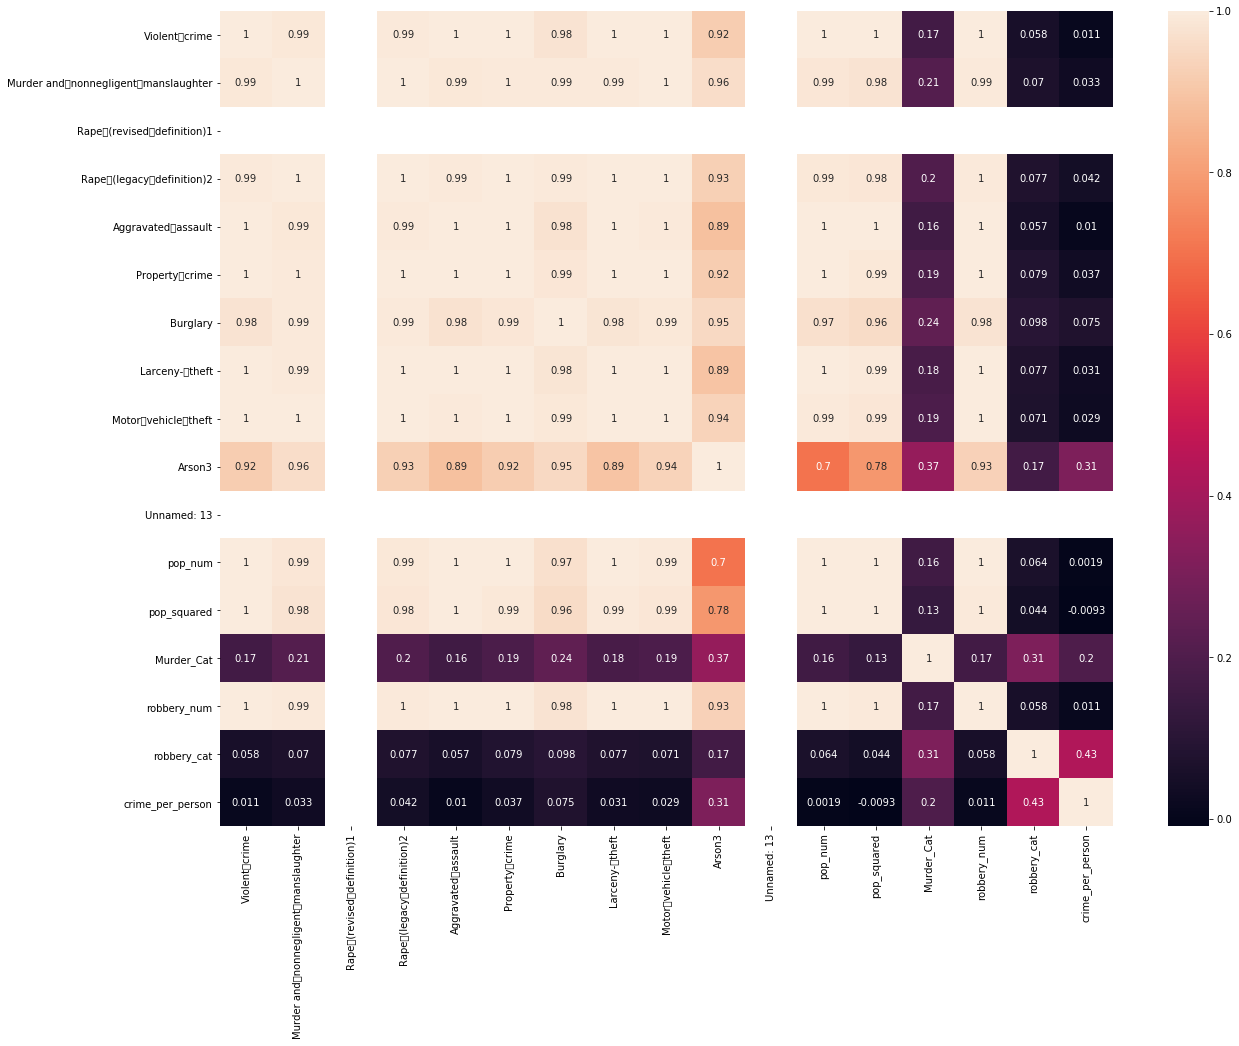

In [17]:
plt.subplots(figsize=(20,15))
sns.heatmap(data_numeric.corr(), annot=True)

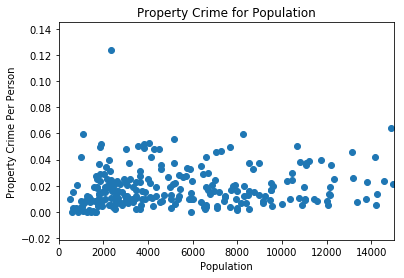

In [18]:
# Graph actual property crime against actual population in a histogram
plt.scatter(data_numeric['pop_num'], data_numeric['crime_per_person'])
plt.xlabel('Population')
plt.xlim(0, 15000)
plt.ylabel('Property Crime Per Person')
plt.title('Property Crime for Population')
plt.show()

In [19]:
data_numeric['Violent\rcrime'].describe()

count     348.000
mean      201.595
std      2815.269
min         0.000
25%         2.000
50%         6.000
75%        22.000
max     52384.000
Name: Violent\rcrime, dtype: float64

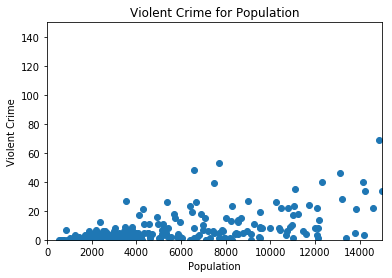

In [20]:
# Graph actual property crime against actual population in a histogram
plt.scatter(data_numeric['pop_num'], data_numeric['Violent\rcrime'])
plt.xlabel('Population')
plt.xlim(0, 15000)
plt.ylim(0, 150)
plt.ylabel('Violent Crime')
plt.title('Violent Crime for Population')
plt.show()

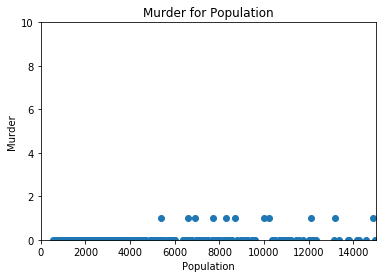

In [21]:
# Graph actual property crime against murder 
plt.scatter(data_numeric['pop_num'], data_numeric['Murder and\rnonnegligent\rmanslaughter'])
plt.xlabel('Population')
plt.xlim(0, 15000)
plt.ylim(0, 10)
plt.ylabel('Murder')
plt.title('Murder for Population')
plt.show()

# Something in the above graph indicates that about eight cities, with a range of populations, experience higher crime per person than average.

In [22]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()

# Our output
Y = data_numeric['Property\rcrime'].values.reshape(-1, 1)

# Pick three features to fit against. Do I need to use these three???
X = data_numeric[['pop_num','Murder_Cat','Violent\rcrime']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# Inspect the results.
print('\nCoefficients: Population, Murder Cat, and Violent Crime\n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: Population, Murder Cat, and Violent Crime
 [[-4.19527004e-03  5.48329569e+02  3.37411301e+00]]

Intercept: 
 [203.16394496]

R-squared:
0.9969073596360518


# Examining the multivariate normality

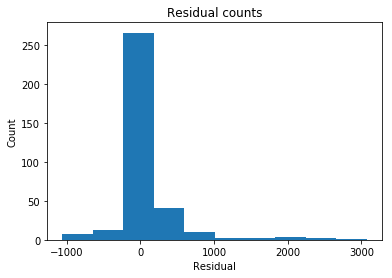

In [24]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data_numeric['Property\rcrime']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Above is skewed a bit to the right, but almost looks norma. besides the residuals > 1000

# Not sure what to say about the scedasticity below

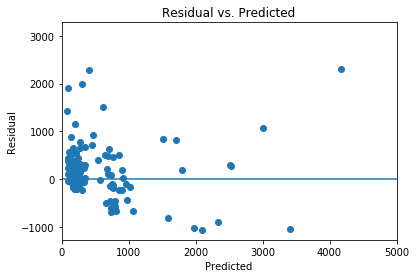

In [28]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.xlim(0, 5000)
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [27]:
correlation_matrix = X.corr()
display(correlation_matrix)

,pop_num,Murder_Cat,Violent crime
pop_num,1.000,0.162,0.999
Murder_Cat,0.162,1.000,0.166
Violent\rcrime,0.999,0.166,1.000
